In [101]:
import pandas as pd
df_train = pd.read_csv('twitter_training.csv', index_col = False)
df_val = pd.read_csv('twitter_validation.csv', index_col = False)
df_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [102]:
df_train.columns = ['social', 'Entity', 'Sentiment', 'Content']
df_val.columns = ['social', 'Entity', 'Sentiment', 'Content']
df_train
df_val

,social,Entity,Sentiment,Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   social     74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Content    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [104]:
content_train = df_train['Content']
content_val = df_val['Content']
sentiment_train = df_train['Sentiment']
sentiment_val = df_val['Sentiment']
print(sentiment_train.value_counts())
print()
print(sentiment_val.value_counts())

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: Sentiment, dtype: int64


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

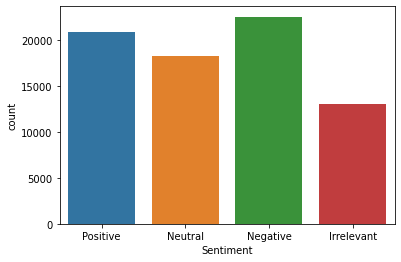

In [105]:
import seaborn as sns
sns.countplot(x=df_train['Sentiment'])

In [106]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# stop_words = stopwords.words('english')
# df_train['Content'] = df_train['Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
import re   
REPLACE_WITH_SPACE = re.compile(r"(@)")
SPACE = " "

def preprocess_reviews(reviews):  
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, str(line)) for line in reviews]
    return reviews

no_at_rate_content_train = preprocess_reviews(content_train)
no_at_rate_content_val = preprocess_reviews(content_val)
no_at_rate_content_val
    

["BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…",
 ' Microsoft Why do I pay for WORD when it functions so poorly on my  SamsungUS Chromebook? 🙄',
 "CSGO matchmaking is so full of closet hacking, it's a truly awful game.",
 'Now the President is slapping Americans in the face that he really did commit an unlawful act after his  acquittal! From Discover on Google vanityfair.com/news/2020/02/t…',
 'Hi  EAHelp I’ve had Madeleine McCann in my cellar for the past 13 years and the little sneaky thing just escaped whilst I was loading up some fifa points, she took my card and I’m having to use my paypal account but it isn’t working, can you help me resolve it please?',
 'Thank you  EAMaddenNFL!! \n\nNew TE Austin Hooper in the ORANGE & BROWN!! \n\n#Browns |  AustinHooper18 \n\n pic.twitter.com/GRg4xzFKOn',
 'Rocket League, Sea of Thieves or Rainbow Six: Siege🤔? I love playing all three on stream but which is the best? #stream #twi

In [107]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(' '.join([word for word in review.split()  if word not in stop]))
    return removed_stop_words

nostop_content_train = remove_stop_words(no_at_rate_content_train)
nostop_content_val = remove_stop_words(no_at_rate_content_val)

In [109]:
df_train['Content_clear'] = nostop_content_train
df_val['Content_clear'] = nostop_content_val
df_train['Content_clear'] = df_train['Content_clear'].str.replace('[^\w\s]','')
df_val['Content_clear'] = df_val['Content_clear'].str.replace('[^\w\s]','')
df_train


C:\Users\akash\AppData\Local\Temp/ipykernel_22584/3429230750.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['Content_clear'] = df_train['Content_clear'].str.replace('[^\w\s]','')
C:\Users\akash\AppData\Local\Temp/ipykernel_22584/3429230750.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_val['Content_clear'] = df_val['Content_clear'].str.replace('[^\w\s]','')


,social,Entity,Sentiment,Content,Content_clear
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I coming borders I kill all
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder all
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder all
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder all
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,Just realized Windows partition Mac like 6 yea...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,Just realized Mac window partition 6 years beh...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,Just realized windows partition Mac 6 years be...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,Just realized windows partition Mac like 6 yea...


In [110]:
from nltk.tokenize import word_tokenize
nostop_content_train = df_train['Content_clear']
nostop_content_val = df_val['Content_clear']

token_content_train = []
token_content_val = []
for word in nostop_content_train:
    token_content_train.append(word_tokenize(word))

for word in nostop_content_val:
    token_content_val.append(word_tokenize(word))

token_content_train


[['I', 'coming', 'borders', 'I', 'kill', 'all'],
 ['im', 'getting', 'borderlands', 'kill', 'all'],
 ['im', 'coming', 'borderlands', 'murder', 'all'],
 ['im', 'getting', 'borderlands', '2', 'murder', 'all'],
 ['im', 'getting', 'borderlands', 'murder', 'all'],
 ['So',
  'I',
  'spent',
  'hours',
  'making',
  'something',
  'fun',
  'If',
  'know',
  'I',
  'HUGE',
  'Borderlands',
  'fan',
  'Maya',
  'one',
  'favorite',
  'characters',
  'So',
  'I',
  'decided',
  'make',
  'wallpaper',
  'PC',
  'Here',
  'original',
  'image',
  'versus',
  'creation',
  'I',
  'made',
  'Enjoy',
  'pictwittercommLsI5wf9Jg'],
 ['So',
  'I',
  'spent',
  'couple',
  'hours',
  'something',
  'fun',
  'If',
  'know',
  'Im',
  'huge',
  'Borderlands',
  'fan',
  'Maya',
  'one',
  'favorite',
  'characters',
  'I',
  'decided',
  'make',
  'wallpaper',
  'PC',
  'Heres',
  'original',
  'picture',
  'compared',
  'creation',
  'I',
  'made',
  'Have',
  'fun',
  'pictwittercom',
  'mLsI5wf9Jg'],
 ['

In [111]:
df_train['Content_tokenize'] = token_content_train
df_val['Content_tokenize'] = token_content_val
df_train

,social,Entity,Sentiment,Content,Content_clear,Content_tokenize
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I coming borders I kill all,"[I, coming, borders, I, kill, all]"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill all,"[im, getting, borderlands, kill, all]"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder all,"[im, coming, borderlands, murder, all]"
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder all,"[im, getting, borderlands, 2, murder, all]"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder all,"[im, getting, borderlands, murder, all]"
...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,Just realized Windows partition Mac like 6 yea...,"[Just, realized, Windows, partition, Mac, like..."
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,Just realized Mac window partition 6 years beh...,"[Just, realized, Mac, window, partition, 6, ye..."
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,Just realized windows partition Mac 6 years be...,"[Just, realized, windows, partition, Mac, 6, y..."
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,Just realized windows partition Mac like 6 yea...,"[Just, realized, windows, partition, Mac, like..."


In [126]:
from nltk import pos_tag
# pos_train = []
# pos_val = []

# for token_sentence in token_content_train:
#     pos_train.append(pos_tag(token_sentence))

# for token_sentence in token_content_val:
#     pos_train.append(pos_tag(token_sentence))

# pos_train
from nltk.corpus import wordnet
dict_pos = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def pos(token):
    newlist = []
    temp = pos_tag(token)
    for word, tag in temp:
        newlist.append(tuple([word, dict_pos.get(tag[0])]))
    return newlist

df_train['test'] = df_train['Content_tokenize'].apply(pos)
df_val['test'] = df_val['Content_tokenize'].apply(pos)
df_train



,social,Entity,Sentiment,Content,Content_clear,Content_tokenize,Content_lemma,test
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I coming borders I kill all,"[I, coming, borders, I, kill, all]","[I, coming, border, I, kill, all]","[(I, None), (coming, v), (borders, n), (I, Non..."
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill all,"[im, getting, borderlands, kill, all]","[im, getting, borderland, kill, all]","[(im, n), (getting, v), (borderlands, n), (kil..."
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder all,"[im, coming, borderlands, murder, all]","[im, coming, borderland, murder, all]","[(im, n), (coming, v), (borderlands, n), (murd..."
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder all,"[im, getting, borderlands, 2, murder, all]","[im, getting, borderland, 2, murder, all]","[(im, n), (getting, v), (borderlands, n), (2, ..."
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder all,"[im, getting, borderlands, murder, all]","[im, getting, borderland, murder, all]","[(im, n), (getting, v), (borderlands, n), (mur..."
...,...,...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,Just realized Windows partition Mac like 6 yea...,"[Just, realized, Windows, partition, Mac, like...","[Just, realized, Windows, partition, Mac, like...","[(Just, r), (realized, v), (Windows, n), (part..."
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,Just realized Mac window partition 6 years beh...,"[Just, realized, Mac, window, partition, 6, ye...","[Just, realized, Mac, window, partition, 6, ye...","[(Just, r), (realized, v), (Mac, n), (window, ..."
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,Just realized windows partition Mac 6 years be...,"[Just, realized, windows, partition, Mac, 6, y...","[Just, realized, window, partition, Mac, 6, ye...","[(Just, r), (realized, v), (windows, n), (part..."
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,Just realized windows partition Mac like 6 yea...,"[Just, realized, windows, partition, Mac, like...","[Just, realized, window, partition, Mac, like,...","[(Just, r), (realized, v), (windows, n), (part..."


In [127]:
df_train.pop("Content_lemma")
df_val.pop("Content_lemma")

0      [BBC, News, Amazon, bos, Jeff, Bezos, reject, ...
1      [Microsoft, Why, I, pay, WORD, function, poorl...
2      [CSGO, matchmaking, full, closet, hacking, tru...
3      [Now, President, slapping, Americans, face, re...
4      [Hi, EAHelp, Ive, Madeleine, McCann, cellar, p...
                             ...                        
994    [Toronto, art, culture, capital, Canada, it, w...
995    [tHIS, IS, ACTUALLY, A, GOOD, MOVE, TOT, BRING...
996    [Today, sucked, it, time, drink, wine, n, play...
997     [Bought, fraction, Microsoft, today, Small, win]
998    [Johnson, Johnson, stop, selling, talc, baby, ...
Name: Content_lemma, Length: 999, dtype: object

In [132]:
df_train.rename(columns={'test':'Content_POS'}, inplace = True)
df_val.rename(columns={'test':'Content_POS'}, inplace = True)


In [133]:
df_train

,social,Entity,Sentiment,Content,Content_clear,Content_tokenize,Content_POS
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I coming borders I kill all,"[I, coming, borders, I, kill, all]","[(I, None), (coming, v), (borders, n), (I, Non..."
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill all,"[im, getting, borderlands, kill, all]","[(im, n), (getting, v), (borderlands, n), (kil..."
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder all,"[im, coming, borderlands, murder, all]","[(im, n), (coming, v), (borderlands, n), (murd..."
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder all,"[im, getting, borderlands, 2, murder, all]","[(im, n), (getting, v), (borderlands, n), (2, ..."
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder all,"[im, getting, borderlands, murder, all]","[(im, n), (getting, v), (borderlands, n), (mur..."
...,...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,Just realized Windows partition Mac like 6 yea...,"[Just, realized, Windows, partition, Mac, like...","[(Just, r), (realized, v), (Windows, n), (part..."
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,Just realized Mac window partition 6 years beh...,"[Just, realized, Mac, window, partition, 6, ye...","[(Just, r), (realized, v), (Mac, n), (window, ..."
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,Just realized windows partition Mac 6 years be...,"[Just, realized, windows, partition, Mac, 6, y...","[(Just, r), (realized, v), (windows, n), (part..."
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,Just realized windows partition Mac like 6 yea...,"[Just, realized, windows, partition, Mac, like...","[(Just, r), (realized, v), (windows, n), (part..."


In [135]:
from nltk.stem import WordNetLemmatizer
lemmatization = WordNetLemmatizer()

def find_lemma(pair_list):
    string = ""
    for word, tag in pair_list:
        if not tag:
            string = string + " " + word
        else:
            lemma = lemmatization.lemmatize(word, pos = tag)
            string = string + " " + lemma
    return string

df_train['Content_lemma'] = df_train['Content_POS'].apply(find_lemma)
df_val['Content_lemma'] = df_val['Content_POS'].apply(find_lemma)


In [136]:
df_train

,social,Entity,Sentiment,Content,Content_clear,Content_tokenize,Content_POS,Content_lemma
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I coming borders I kill all,"[I, coming, borders, I, kill, all]","[(I, None), (coming, v), (borders, n), (I, Non...",I come border I kill all
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill all,"[im, getting, borderlands, kill, all]","[(im, n), (getting, v), (borderlands, n), (kil...",im get borderland kill all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder all,"[im, coming, borderlands, murder, all]","[(im, n), (coming, v), (borderlands, n), (murd...",im come borderland murder all
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder all,"[im, getting, borderlands, 2, murder, all]","[(im, n), (getting, v), (borderlands, n), (2, ...",im get borderland 2 murder all
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder all,"[im, getting, borderlands, murder, all]","[(im, n), (getting, v), (borderlands, n), (mur...",im get borderland murder all
...,...,...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,Just realized Windows partition Mac like 6 yea...,"[Just, realized, Windows, partition, Mac, like...","[(Just, r), (realized, v), (Windows, n), (part...",Just realize Windows partition Mac like 6 yea...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,Just realized Mac window partition 6 years beh...,"[Just, realized, Mac, window, partition, 6, ye...","[(Just, r), (realized, v), (Mac, n), (window, ...",Just realize Mac window partition 6 year behi...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,Just realized windows partition Mac 6 years be...,"[Just, realized, windows, partition, Mac, 6, y...","[(Just, r), (realized, v), (windows, n), (part...",Just realize window partition Mac 6 year behi...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,Just realized windows partition Mac like 6 yea...,"[Just, realized, windows, partition, Mac, like...","[(Just, r), (realized, v), (windows, n), (part...",Just realize window partition Mac like 6 year...


In [145]:
fin_data = df_train

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Content_lemma'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data

,social,Entity,Sentiment,Content,Content_clear,Content_tokenize,Content_POS,Content_lemma,Vader Sentiment,Vader Analysis
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I coming borders I kill all,"[I, coming, borders, I, kill, all]","[(I, None), (coming, v), (borders, n), (I, Non...",I come border I kill all,-0.6908,Negative
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill all,"[im, getting, borderlands, kill, all]","[(im, n), (getting, v), (borderlands, n), (kil...",im get borderland kill all,-0.6908,Negative
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder all,"[im, coming, borderlands, murder, all]","[(im, n), (coming, v), (borderlands, n), (murd...",im come borderland murder all,-0.6908,Negative
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder all,"[im, getting, borderlands, 2, murder, all]","[(im, n), (getting, v), (borderlands, n), (2, ...",im get borderland 2 murder all,-0.6908,Negative
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder all,"[im, getting, borderlands, murder, all]","[(im, n), (getting, v), (borderlands, n), (mur...",im get borderland murder all,-0.6908,Negative
...,...,...,...,...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,Just realized Windows partition Mac like 6 yea...,"[Just, realized, Windows, partition, Mac, like...","[(Just, r), (realized, v), (Windows, n), (part...",Just realize Windows partition Mac like 6 yea...,0.3612,Neutral
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,Just realized Mac window partition 6 years beh...,"[Just, realized, Mac, window, partition, 6, ye...","[(Just, r), (realized, v), (Mac, n), (window, ...",Just realize Mac window partition 6 year behi...,0.0000,Neutral
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,Just realized windows partition Mac 6 years be...,"[Just, realized, windows, partition, Mac, 6, y...","[(Just, r), (realized, v), (windows, n), (part...",Just realize window partition Mac 6 year behi...,0.0000,Neutral
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,Just realized windows partition Mac like 6 yea...,"[Just, realized, windows, partition, Mac, like...","[(Just, r), (realized, v), (windows, n), (part...",Just realize window partition Mac like 6 year...,-0.2500,Neutral


In [144]:
vader_counts = fin_data['Vader Analysis'].value_counts()
train_count = df_train['Sentiment'].value_counts()
print(vader_counts)
print()
print(train_count)

Neutral     38874
Positive    20857
Negative    14950
Name: Vader Analysis, dtype: int64

Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64
